In [1]:
# %load nbinit.py
# Initialize stuff
import matplotlib
matplotlib.use('nbagg')

import numpy as np
from functools import partial

from xraycam import camcontrol
from xraycam.camcontrol import plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def runset_and_merge(run_prefix, number_runs, run = False, threshold_min = 31, threshold_max =  55, **kwargs):
    """Returns a Frame"""
    runset = camcontrol.RunSet(run_prefix= run_prefix,
        run = run, number_runs = number_runs, **kwargs)
    return runset.filter_reduce_frames(threshold_min = threshold_min, threshold_max = threshold_max)

def runset_merge_plot(*args, rebin = 10, **kwargs):
    frame = runset_and_merge(*args, **kwargs)
    return frame, frame.plot_lineout(rebin = rebin)

def lineout_subregion(frame, cutoff, rebin = 2, error_bars = True, **kwargs):
    """Plot a lineout of the lower `cutoff` pixels of the frame"""
    import copy
    nframe = copy.deepcopy(frame)
    nframe.data = nframe.data[len(frame.data) - cutoff:, :]
    return nframe.plot_lineout(rebin = rebin, error_bars = error_bars)

In [3]:
frame = runset_and_merge('data/5.26.data0', 150, gain = '0x3f',
        numExposures = 1000, run = True, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Configuring PRU.\r\n\tINFO: Executing PRU program.\r\ngain: 63\nconfigure: 0\ncheck_gain(): 63\n\tINFO: PRU 1 completed transfer.\r\ndata/5.26.data0_0test.dat\ndata/5.26.data0_0singles.dat\ndata/5.26.data0_0pixels.dat\ndata/5.26.data0_0sum.dat\ndata/5.26.data0_02dhisto.dat\n'
b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Configuring PRU.\r\n\tINFO: Executing PRU program.\r\ngain: 63\nconfigure: 0\ncheck_gain(): 63\n\tINFO: PRU 1 completed transfer.\r\ndata/5.26.data0_1test.dat\ndata/5.26.data0_1singles.dat\ndata/5.26.data0_1pixels.dat\ndata/5.26.data0_1sum.dat\ndata/5.26.data0_12dhisto.dat\n'
b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Configuring PRU.\r\n\tINFO: Executing PRU pr

<IPython.core.display.Javascript object>


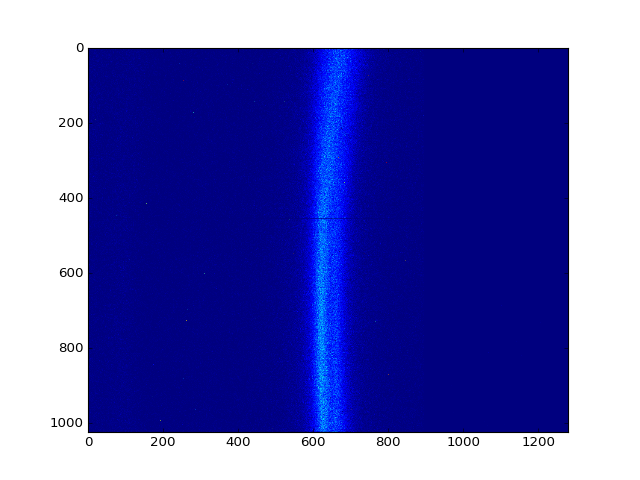

In [4]:
frame.show()

In [22]:
frame.plot_lineout(error_bars=False,rebin=5)
plt.show()

In [14]:
plt.plot(np.sum(frame.data[600:,:],axis=0))
plt.show()

In [21]:
plt.plot(np.sum(frame.data[600:,:]/45,axis=0))
plt.show()

# Take another overnight exposure, without a windows update

#### Check alignment before long exposure

In [23]:
frame2 = runset_and_merge('data/5.26.data1', 1, gain = '0x3f',
        numExposures = 1000, run = True, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Configuring PRU.\r\n\tINFO: Executing PRU program.\r\ngain: 63\nconfigure: 0\ncheck_gain(): 63\n\tINFO: PRU 1 completed transfer.\r\ndata/5.26.data1_0test.dat\ndata/5.26.data1_0singles.dat\ndata/5.26.data1_0pixels.dat\ndata/5.26.data1_0sum.dat\ndata/5.26.data1_02dhisto.dat\n'


<IPython.core.display.Javascript object>


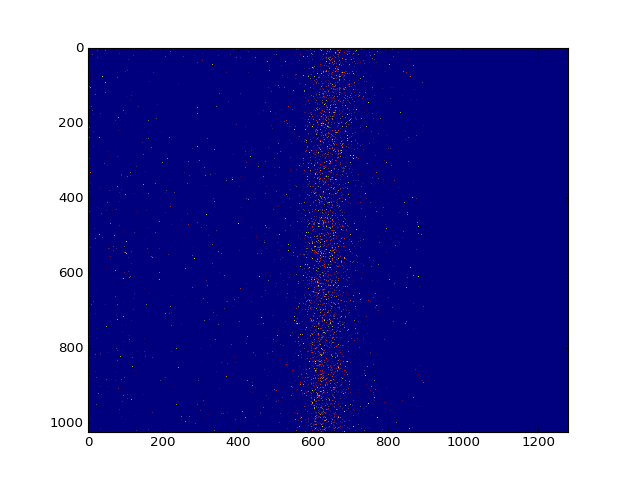

In [26]:
frame2.show()
frame2.plot_lineout(error_bars=False)
plt.show()

## Signal and alignment looks good, taking overnight exposure (15hrs=432000 exposures)

In [27]:
longframe = runset_and_merge('data/5.26.longdata0', 432, gain = '0x3f',
        numExposures = 1000, run = True, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Configuring PRU.\r\n\tINFO: Executing PRU program.\r\ngain: 63\nconfigure: 0\ncheck_gain(): 63\n\tINFO: PRU 1 completed transfer.\r\ndata/5.26.longdata0_0test.dat\ndata/5.26.longdata0_0singles.dat\ndata/5.26.longdata0_0pixels.dat\ndata/5.26.longdata0_0sum.dat\ndata/5.26.longdata0_02dhisto.dat\n'
b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Configuring PRU.\r\n\tINFO: Executing PRU program.\r\ngain: 63\nconfigure: 0\ncheck_gain(): 63\n\tINFO: PRU 1 completed transfer.\r\ndata/5.26.longdata0_1test.dat\ndata/5.26.longdata0_1singles.dat\ndata/5.26.longdata0_1pixels.dat\ndata/5.26.longdata0_1sum.dat\ndata/5.26.longdata0_12dhisto.dat\n'
b'threshold value: 15\nupper and lower bound: 55, 31\nSetting cluster rejection mode\n\tINFO: performed sensor initial configuration. Conf

FileNotFoundError: [Errno 2] No such file or directory: 'data/5.26.longdata0_414sum.dat'

In [2]:
longframe = runset_and_merge('data/5.26.longdata0', 413, gain = '0x3f',
        numExposures = 1000, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

<IPython.core.display.Javascript object>


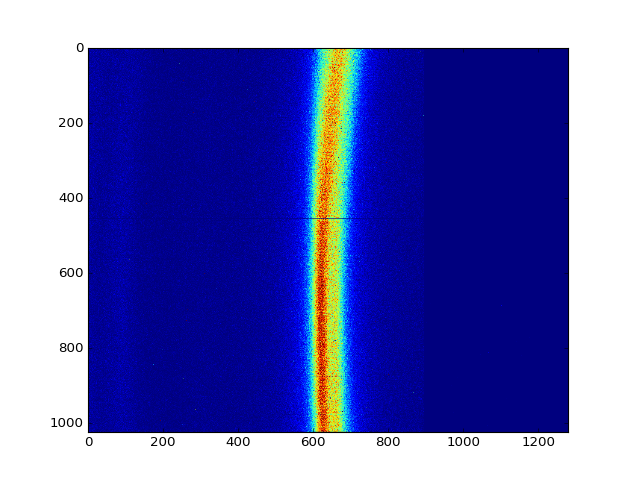

In [45]:
longframe.show(vmax = 2250)

In [48]:
[plt.plot(np.sum(longframe.data[i:,:],axis=0)/max(np.sum(longframe.data[i:,:],axis=0))) for i in (0,250,500,750)]
plt.show()

In [50]:
plt.plot(np.sum(longframe.data[500:,:],axis=0), label = 'GaP XES')
plt.show()

In [6]:
longframe.plot_lineout(error_bars=True)
plt.show()

In [5]:
plt.plot(np.sum(longframe.data,axis=0)/45)
plt.show()

In [24]:
plt.plot(np.sum(longframe.data[500:,:],axis=0)/45)
plt.show()

In [25]:
np.savetxt('5.26.longdatalineout.dat',np.sum(longframe.data[500:,:],axis=0)/45)

In [46]:
longframe.plot_lineout(error_bars=True)
longframe.plot_lineout(error_bars=True,rebin=2)
plt.show()

In [47]:
ls

5.13.data.ipynb             5.20.data.ipynb           data/
5.13.LongImage.dat          5.20.longframe.dat        DataTemplate.ipynb
5.16.data.ipynb             5.20.longframe_image.dat  Learning.ipynb
5.19.FocusComparison.ipynb  5.25.data.ipynb           MinisoftLongData5.13
5.19.FocusTest.ipynb        5.26.data.ipynb           testing.ipynb
5.20.analysis.ipynb         5.26.longdatalineout.dat  VariousCalculations.ipynb
